In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
X = []
Y = []
with open('./../topic2-decision-trees/train.csv', 'r') as f:
    f.readline()
    for line in f:
        data = line.strip().split(',')
        X.append([float(i) for i in data[1:]])
        Y.append(int(data[0]))
        
X = np.array(X)
Y = np.array(Y)

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

In [5]:
mnb_clf = MultinomialNB()

In [6]:
mnb_clf.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [7]:
Y_pred = mnb_clf.predict(X_test)
print(classification_report(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          0       0.92      0.93      0.92      2013
          1       0.88      0.93      0.91      2310
          2       0.88      0.82      0.85      2085
          3       0.80      0.79      0.80      2212
          4       0.84      0.75      0.79      2060
          5       0.85      0.64      0.73      1913
          6       0.88      0.91      0.89      2082
          7       0.94      0.83      0.88      2165
          8       0.65      0.79      0.71      2026
          9       0.70      0.84      0.77      2134

avg / total       0.83      0.83      0.83     21000



In [8]:
bnb_clf = BernoulliNB()
bnb_clf.fit(X_train, Y_train)
Y_pred = bnb_clf.predict(X_test)
print(classification_report(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          0       0.90      0.91      0.91      2013
          1       0.88      0.95      0.91      2310
          2       0.86      0.82      0.84      2085
          3       0.76      0.78      0.77      2212
          4       0.82      0.82      0.82      2060
          5       0.82      0.70      0.75      1913
          6       0.88      0.90      0.89      2082
          7       0.93      0.85      0.88      2165
          8       0.77      0.77      0.77      2026
          9       0.74      0.83      0.78      2134

avg / total       0.84      0.84      0.83     21000



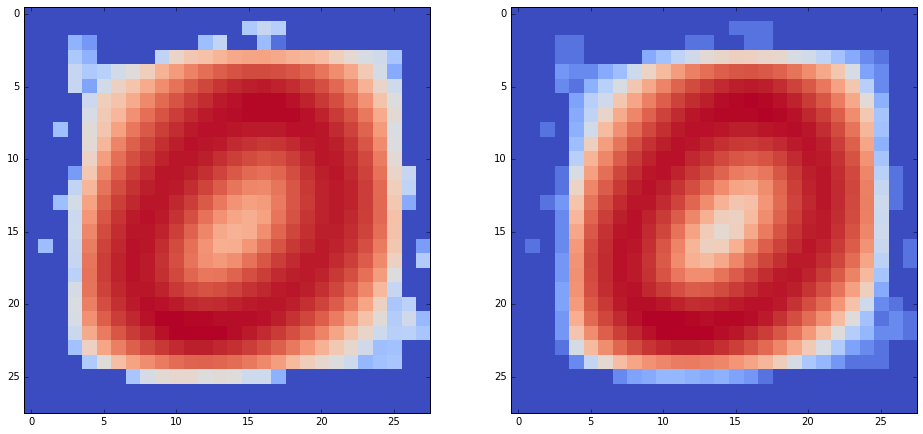

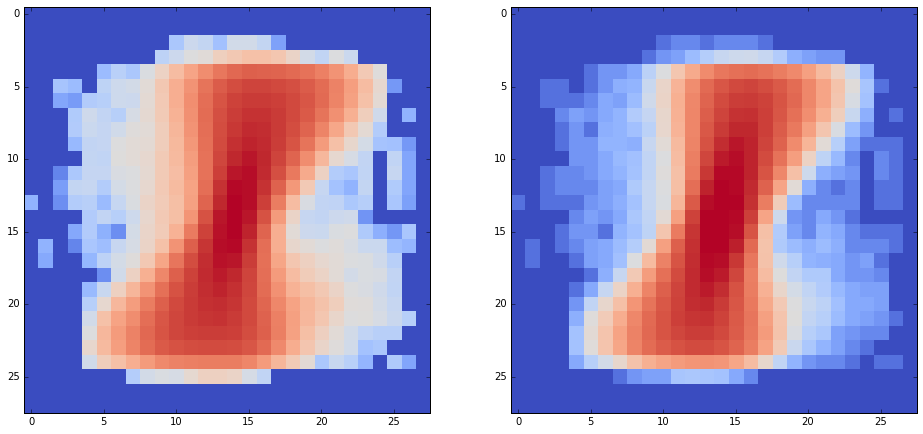

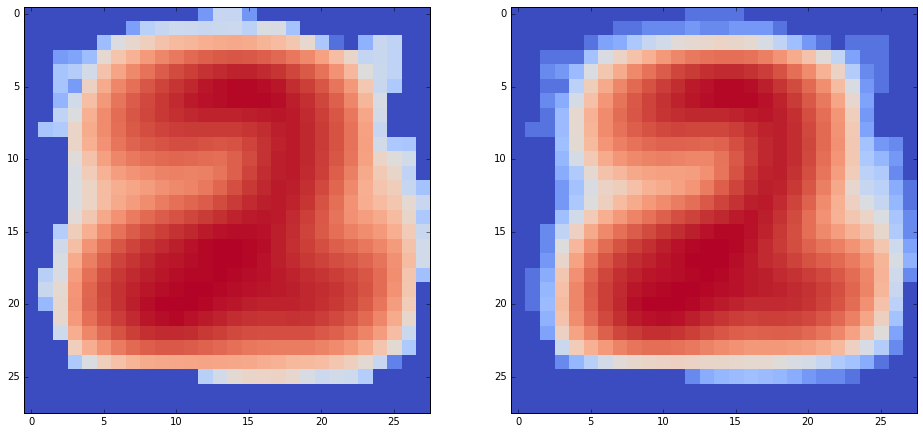

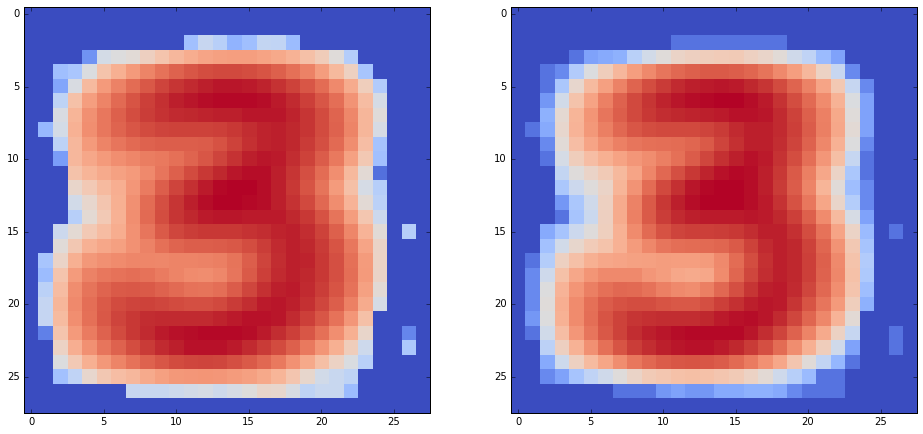

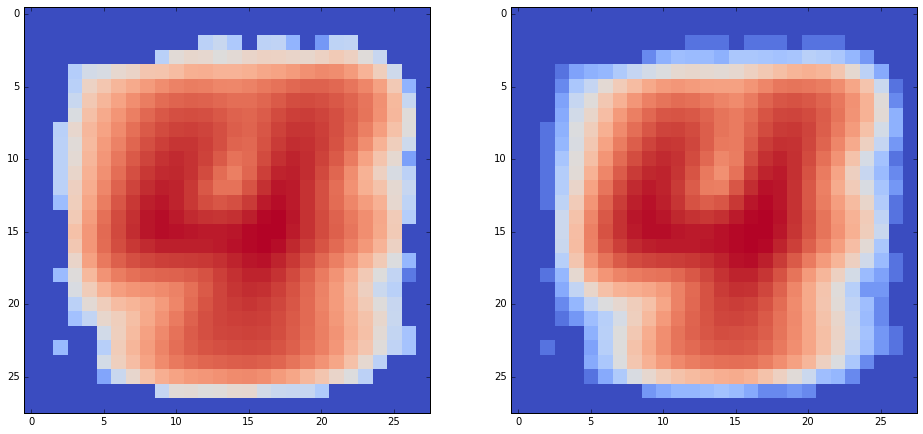

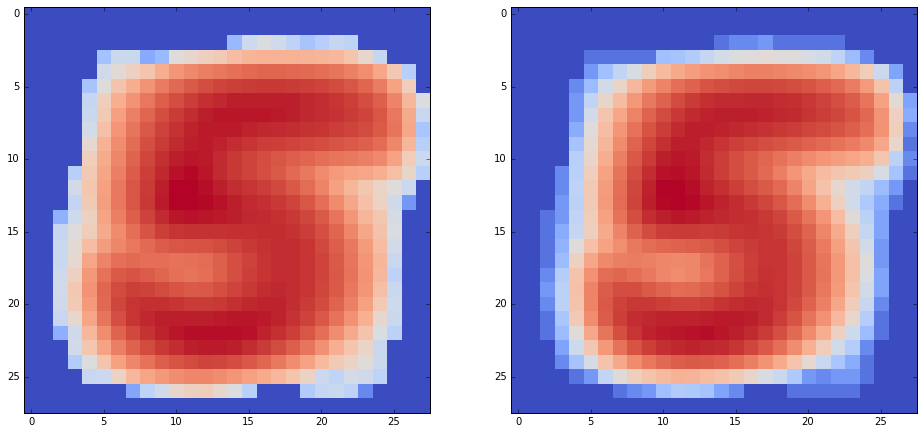

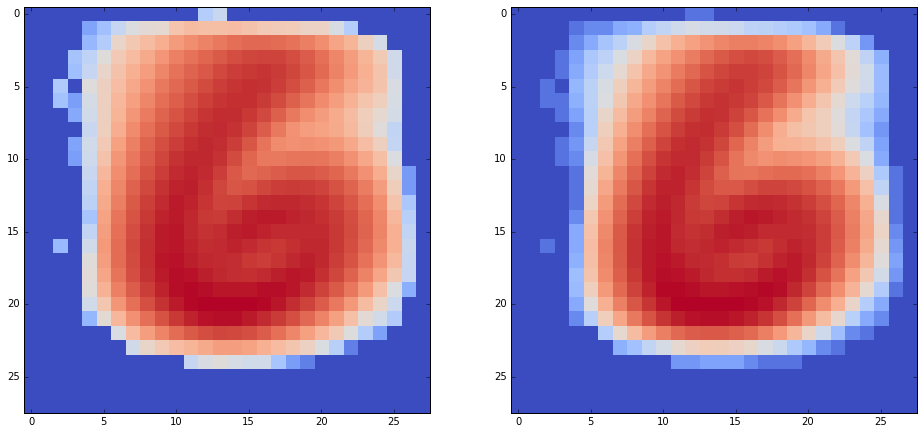

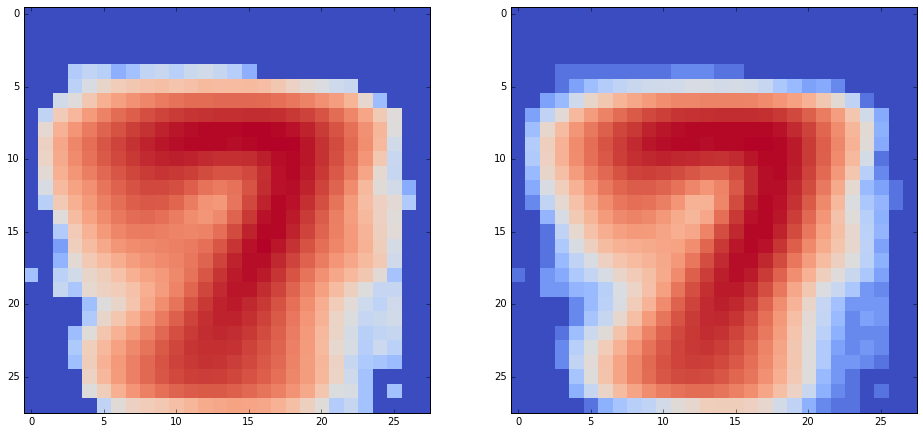

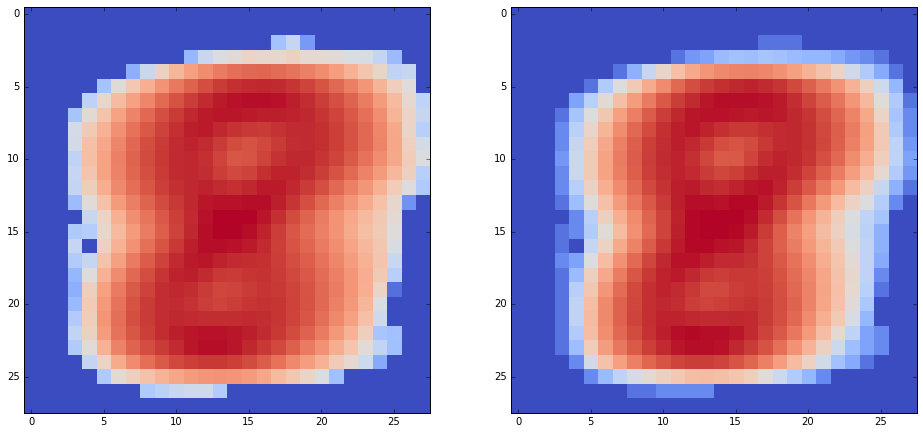

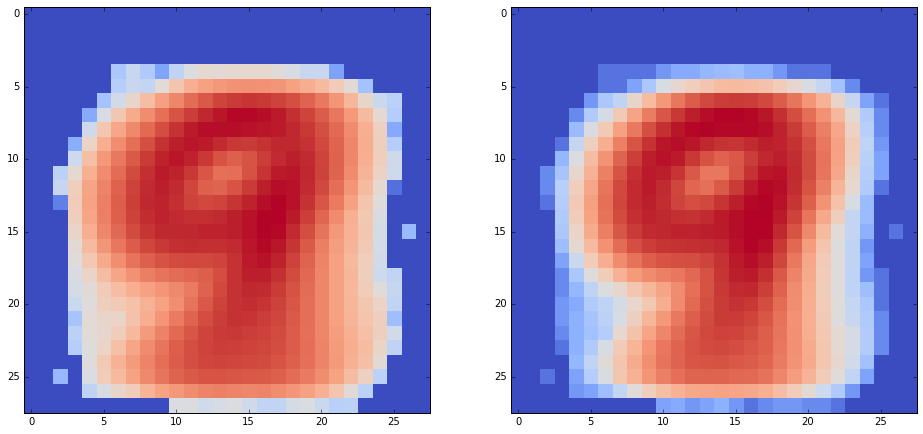

In [23]:
for (mnb_coef, bnb_coef) in zip(mnb_clf.coef_, bnb_clf.coef_):
#     coefs = np.array((mnb_coef, bnb_coef)).reshape(2,28,28).transpose(1,0,2).reshape(28,28*2)
#     plt.figure()
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16,8))
    ax1.imshow(
        mnb_coef.reshape(28,28),
        interpolation='nearest', 
        cmap='coolwarm'
    )
    ax2.imshow(
        bnb_coef.reshape(28,28),
        interpolation='nearest', 
        cmap='coolwarm'
    )
    plt.show()

In [29]:
# for klass_image in (clf.coef_):
#     plt.figure(figsize=(5,5))
#     plt.imshow(
#         klass_image.reshape(28,28),
#         interpolation='nearest', 
#         cmap='coolwarm'
#     )
#     plt.show()

In [30]:
# clf = BernoulliNB()
# clf.fit(X_train, Y_train)
# for klass_image in (clf.coef_):
#     plt.figure(figsize=(5,5))
#     plt.imshow(
#         klass_image.reshape(28,28),
#         interpolation='nearest', 
#         cmap='coolwarm'
#     )
#     plt.show()